# TRABALHO 3 DE CÁLCULO NUMÉRICO

# Alunos: Pedro Machado, João Centenaro e Alex Lima

## Questão 1:
x = {0,15 |0,17 |0,19 |0,21 |0,23 |0,25 |0,27 |0,29 |0,31}
f(x) = {0,1761 |0,2304 |0,2788 |0,3222 |0,3617 |0,3979 |0,4314 |0,4624 |0,4914}

a) Utilizando a Forma de Lagrange para interpolar todos os pontos tabelados e fazer uma estimativa para f(0,20) e f(0,22)
b) Plotar o gráfico do polinômio obtido

Pela Forma de Lagrange, temos que $P(x) = y_0 l_0(x) + y_1 l_1(x) + y_2 l_2(x) + y_3 l_3(x) + y_4 l_4(x) + y_5 l_5(x) + y_6 l_6(x) + y_7 l_7(x) + y_8 l_8(x)$

Assim, montamos um programa em Python para calcular nosso polinômio e achar os pontos:

P( 0.2 ) 0.30103611755371096
P( 0.22 ) 0.34239778747558597


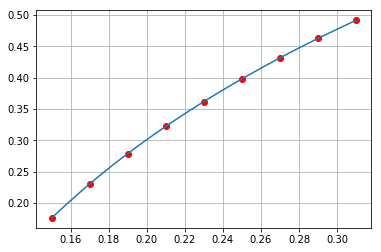

In [7]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = [0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31]
Y = [0.1761, 0.2304, 0.2788, 0.3222, 0.3617, 0.3979, 0.4314, 0.4624, 0.4914]


def calcP(x):
    valor = 0
    for k in range(len(Y)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor +Y[k]*lk 
    return valor

print ("P(",0.20,")", calcP(0.20))
print ("P(",0.22,")", calcP(0.22))


Xplot = []
Yplot = []
n = 20              
dx = (X[-1]-X[0])/n 
 
for i in range(n+1):
    x = X[0] + i*dx
    y = calcP(x)
    Xplot.append(x)
    Yplot.append(y)


plt.plot(X, Y, "ro")  
plt.plot(Xplot, Yplot, "-") 
plt.grid(True) 
plt.show()

c) A questão pede um polinômio de grau 3, logo temos que usar n+1 termos, que é 4.
Assim, podemos repetir o código anterior para 4 termos equidistantes, ao invés dos 9 dados:

P( 0.2 ) 0.30095078124999997
P( 0.22 ) 0.34244296875


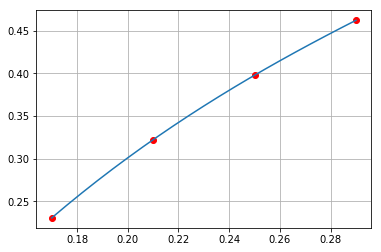

In [8]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = [0.17, 0.21, 0.25, 0.29]
Y = [0.2304, 0.3222, 0.3979, 0.4624]


def calcP(x):
    valor = 0
    for k in range(len(Y)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor +Y[k]*lk 
    return valor

print ("P(",0.20,")", calcP(0.20))
print ("P(",0.22,")", calcP(0.22))


Xplot = []
Yplot = []
n = 20              
dx = (X[-1]-X[0])/n 
 
for i in range(n+1):
    x = X[0] + i*dx
    y = calcP(x)
    Xplot.append(x)
    Yplot.append(y)


plt.plot(X, Y, "ro")  
plt.plot(Xplot, Yplot, "-") 
plt.grid(True) 
plt.show()

Assim, pelo gráfico, podemos notar que a curva é semelhante a da letra b), porém os valores dos pontos são menos aproximados, devido ao menor número de ponto avaliados para a interpolação

d) Para a Fórmula de Newton, usaremos as diferenças divididas, dadas pela forma:
$$f[x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8]= \frac{f[x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8] - f[x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7]}{x_8 - x_0} $$

Assim, montamos o programa:

P( 0.2 ) 0.30103611755371096
P( 0.22 ) 0.342397787475586


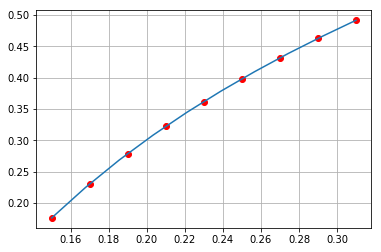

In [16]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Definindo a lista de pontos a serem interpolados
X  = [0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31]
Y  = [0.1761, 0.2304, 0.2788, 0.3222, 0.3617, 0.3979, 0.4314, 0.4624, 0.4914]    
dd = []  #dd sendo as diferenças divididas  




dd.append(Y) 
     


for ordem in range(1, len(X), 1):
    dd.append([])   
    
    
    for k in range(0, len(X)-ordem, 1): 
         
        valor = (dd[ordem-1][k+1]-dd[ordem-1][k])/(X[k+ordem]-X[k])    
               
        dd[ordem].append(valor)
    


def produtorio(x,n):
    prod = 1.
    for i in range(n):
        prod = prod * (x-X[i])
    return prod


def calculaP(x):
    soma = dd[0][0]
    for i in range(1,len(X)):
        soma = soma + produtorio(x,i)*dd[i][0]
    return soma

print ("P(",0.20,")", calculaP(0.20))
print ("P(",0.22,")", calculaP(0.22))

Xp = np.linspace(X[0], X[-1], num=10) 
Yp = []
for x in Xp:
    y = calculaP(x)
    Yp.append(y)

    
plt.plot(X, Y, 'ro', Xp, Yp,'-', )
plt.grid()
plt.show()